In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [78]:
data = pd.read_excel('/content/Training data.xlsx')


In [6]:
data.head()

,internet,sex,traveltime,studytime,freetime,absences,age,iq,marks
0,no,M,2,2,5,6,18,118,73.13
1,yes,M,2,2,2,7,19,107,67.78
2,yes,M,3,3,3,5,18,108,70.84
3,no,F,3,3,4,9,17,100,66.68
4,yes,M,1,4,3,4,19,96,71.88


In [10]:
len(data)

1000

In [25]:
X_features = ['internet','sex','traveltime','studytime']

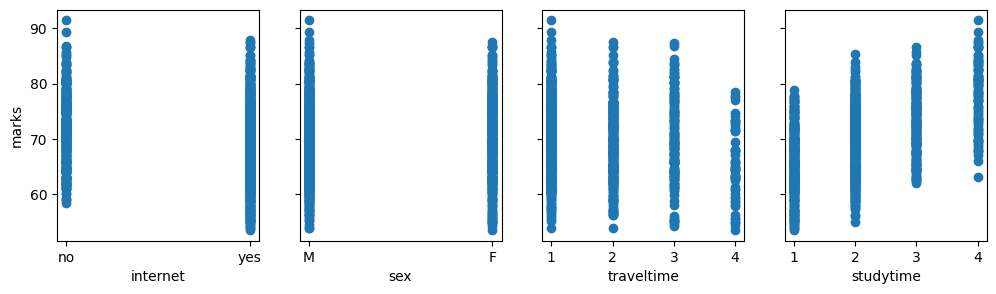

In [26]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("marks")
plt.show()

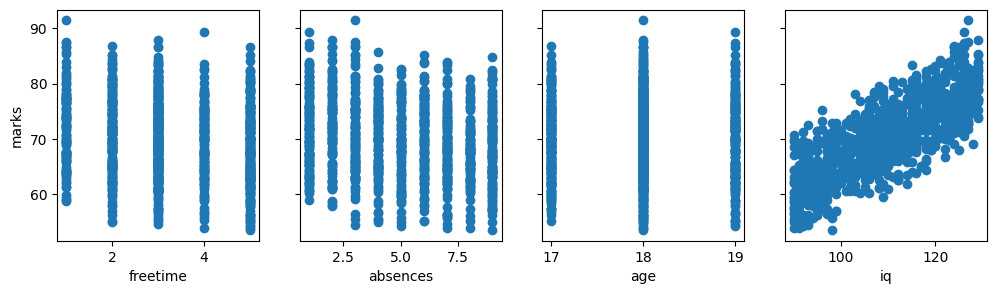

In [27]:
X_features2 = ['freetime','absences','age','iq']
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i+4],y_train)
    ax[i].set_xlabel(X_features2[i])
ax[0].set_ylabel("marks")
plt.show()

Text(0.5, 1.0, 'Distribution of marks - histogram')

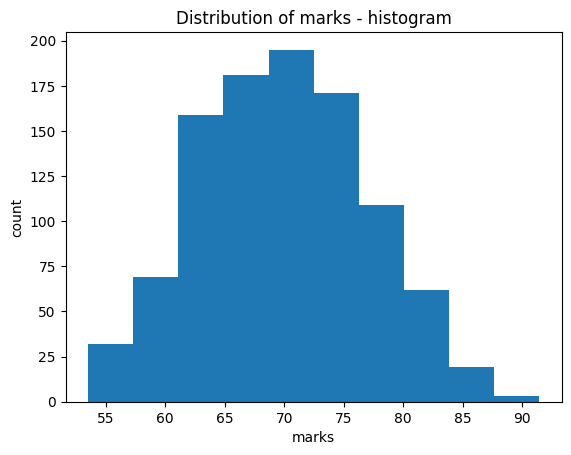

In [30]:
plt.hist(data.marks)
plt.xlabel('marks')
plt.ylabel('count')
plt.title('Distribution of marks - histogram')

In [79]:
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(df):
  df = df.copy()
  df['internet'] = np.where(df['internet'] == 'yes', 1, 0)
  df['sex'] = np.where(df['sex'] == 'M', 1, 0)


  x_train = np.array(df.iloc[:,0:8])
  y_train = np.array(df.iloc[:,8]).reshape(-1,1)

  return x_train, y_train

#x_train,y_train = feature_changing(data)

In [87]:
def feature_changing4(df):
  df = df.copy()
  df['internet'] = np.where(df['internet'] == 'yes', 1, 0)
  df['sex'] = np.where(df['sex'] == 'M', 1, 0)
  df['totaltime'] = df['freetime'] + df['traveltime'] + df['studytime']
  df['study'] = df['studytime']/df['totaltime']

  df = df.drop(['freetime', 'traveltime','sex','age','totaltime','studytime'], axis=1)


  x_train = np.array(df.iloc[:,0:3])
  y_train = np.array(df.iloc[:,3]).reshape(-1,1)

  return x_train, y_train



In [80]:
def feature_changing2(df):
  df = df.copy()
  df['internet'] = np.where(df['internet'] == 'yes', 1, 0)
  df['sex'] = np.where(df['sex'] == 'M', 1, 0)
  df = df.drop(['freetime', 'internet','sex','age','traveltime'], axis=1)

  print(df.shape)
  print(df.columns)
  x_train = np.array(df.iloc[:,0:3])
  y_train = np.array(df.iloc[:,3]).reshape(-1,1)

  return x_train, y_train

#x_train,y_train = feature_changing2(data)

In [81]:
def feature_changing3(df):
  df=df.copy()
  # df['internet'] = np.where(df['internet'] == 'yes', 1, 0)
  # df['sex'] = np.where(df['sex'] == 'M', 1, 0)
  # df = df.drop(['freetime', 'internet','sex','age','traveltime'], axis=1)

  # print(df.shape)
  # print(df.columns)
  df = df[['iq','marks']]
  x_train = np.array(df.iloc[:,0]).reshape(-1,1)
  y_train = np.array(df.iloc[:,1]).reshape(-1,1)

  return x_train, y_train

#x_train,y_train = feature_changing3(data)

In [50]:
x_train.shape, y_train.shape

((1000, 1), (1000, 1))

In [38]:
x_train.shape,y_train.shape

((1000, 8), (1000, 1))

In [13]:
def z_score(x_train):

    # mean for each column
    x_mean = np.mean(x_train, axis=0)

    # std dev for each column
    x_std = np.std(x_train, axis=0)

    # z-score normalisation
    x_norm = (x_train-x_mean)/x_std

    return x_norm,x_std,x_mean

In [17]:
def cost(x_train,y_train,w,b):

    loss = 0.0
    n_rows = x_train.shape[0]

    for i in range(n_rows):
      loss = loss + ((np.dot(x_train[i],w) + b) - y_train[i])**2
    loss = loss/(2*n_rows)
    # print(loss)
    return loss

In [18]:
def gradient(x_train,y_train,w,b):

    m,n = x_train.shape
    dj_dw = np.zeros((n,1))
    dj_db = 0.
    #print(dj_dw.shape)
    for i in range(m):
      err = (np.dot(x_train[i],w) + b) - y_train[i]

      for j in range(n):
        dj_dw[j] = dj_dw[j] + err*x_train[i,j]

      dj_db = dj_db +err

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db


In [19]:
def gradient_descent(x_train,y_train,w,b):

    lr = 0.1   # learning rate

    dj_dw, dj_db = gradient(x_train, y_train, w, b)
    #print(w.shape, dj_dw.shape)

    # update w and b
    w = w - lr*dj_dw
    b = b - lr*dj_db

    return w,b

In [93]:

x_train,y_train =feature_changing(data)
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)
# w = np.zeros((x_train.shape[1],1))
# # w = 0.
# b = 0.

old_cost = 0

# while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
#   old_cost = cost(x_train,y_train,w,b)
#   w,b = gradient_descent(x_train,y_train,w,b)

epochs = 5000
loss = []
for i in range(epochs):
  loss.append(cost(x_train,y_train,w,b))
  w,b = gradient_descent(x_train,y_train,w,b)
print(loss[-1])

df_test = pd.read_excel('/content/Test data.xlsx')
x_predict, ans = feature_changing(df_test)
# x_predict = pd.read_excel('/Test data.xlsx').iloc[:,:8].to_numpy()
# x_predict = feature_changing(x_predict)
# x_predict = (x_predict - x_mean)/x_std
# ans = pd.read_excel('/Test data.xlsx').iloc[:,8].to_numpy()
x_predict,x_std,x_mean = z_score(x_predict)

y_predict = np.dot(x_predict,w) + b

accuracy = 0
print(len(ans))
for dim in range(len(ans)):
  #print(y_predict[dim],ans[dim])
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only

    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

[5.49772581e-06]
200
Optimization required, your accuracy is 72.5%


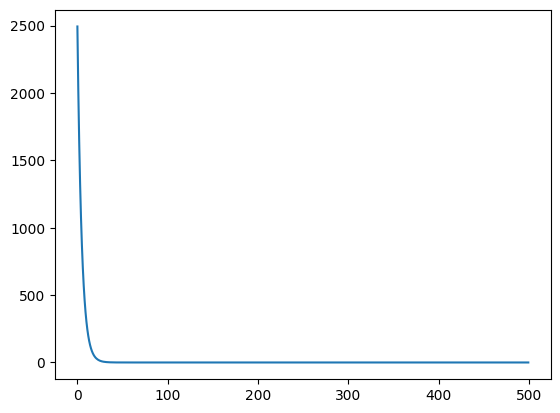

In [97]:
plt.plot(loss[:500])

In [86]:
plt.plot(x_train)

(0.6666666666666666, 0.1)